In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from sklearn.preprocessing import OneHotEncoder

# Data

In [2]:
#Directly importing the dataset from tensorflow
data = tf.keras.datasets.cifar10

In [3]:
#split the data
(training_images, training_labels), (test_images, test_labels) = data.load_data()

In [4]:
training_images

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [5]:
test_images

array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
        

In [6]:
print(len(training_images))
print(len(training_labels))
print(len(test_images))
print(len(test_labels))

50000
50000
10000
10000


In [7]:
print(training_images.shape)
print("size of one single image: ", training_images[1].shape)

(50000, 32, 32, 3)
size of one single image:  (32, 32, 3)


In [8]:
#naming the labels (names are ordere as seen on the cifar10 website)
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

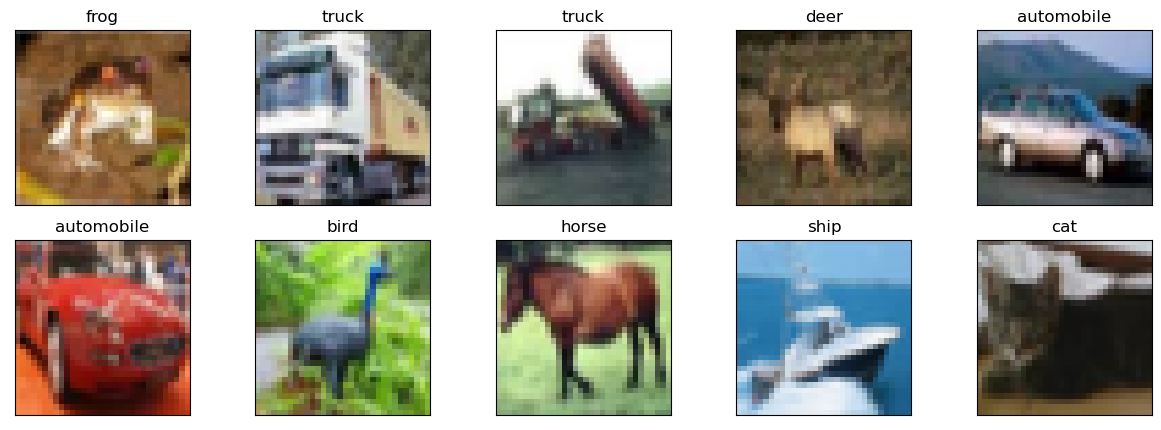

In [9]:
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(15, 5))

index = 0
for x in range(2):
    for y in range(5):
        axes[x,y].set_title(labels[training_labels[index][0]])
        axes[x,y].imshow(training_images[index])
        axes[x,y].get_xaxis().set_visible(False)
        axes[x,y].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [10]:
#turning images into greyscale

training_images = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in training_images])
test_images = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in test_images])

In [11]:
#Reshape images if they are greyscale (for CNN)

training_images = training_images.reshape(training_images.shape[0], training_images.shape[1], training_images.shape[2], 1)
test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)
input_shape = (training_images.shape[1], training_images.shape[2], 1) #replace in the model

In [12]:
#Reshaping our labels to fit the models (do not run this if using OneHot Encoding)
training_labels = training_labels.reshape(-1, )
test_labels = test_labels.reshape(-1, )

In [13]:
training_labels

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [14]:
test_labels

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [ ]:
#Normalize the images
training_images = training_images/255
test_images = test_images/255

In [15]:
print(training_images.shape)

(50000, 32, 32, 1)


# CNN

In [16]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model

In [17]:
# normal = input_shape=(32,32,3)
# greyscale = input_shape=input_shape


cnn_model = Sequential()
cnn_model.add(Conv2D(filters= 32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
cnn_model.add(MaxPool2D(pool_size=(2,2)))
cnn_model.add(Conv2D(filters= 64, kernel_size=(4,4), activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=34, activation='relu'))
cnn_model.add(Dense(units=10, activation='softmax'))

In [18]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 34)                7

In [19]:
# normal loss function: sparse_categorical_crossentropy
# OneHot loss function: categorical_crossentropy

cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy',
                   metrics=['acc'])
cnn_model.fit(training_images, training_labels, validation_data = (test_images, test_labels), epochs= 10)

Epoch 1/10
1563/1563 [==============================] - 17s 11ms/step - loss: 2.4602 - acc: 0.0984 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3045 - acc: 0.0981 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3028 - acc: 0.1000 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 2.3028 - acc: 0.0990 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3028 - acc: 0.0960 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 2.3028 - acc: 0.0967 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3028 - acc: 0.0991 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 8/10
1563/1563 [==========================

# LSTM

In [20]:
training_images.shape

(50000, 32, 32, 1)

In [21]:
# normal = input_shape=(1024,3)
# greyscale = input_shape=(32, 32)

lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, input_shape=(32, 32), return_sequences=True),
    tf.keras.layers.LSTM(32), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [22]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32, 32)            8320      
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 19,402
Trainable params: 19,402
Non-trainable params: 0
_________________________________________________________________


In [23]:
# normal loss function: sparse_categorical_crossentropy
# OneHot loss function: categorical_crossentropy

lstm_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy',
                   metrics=['acc'])
lstm_model.fit(training_images, training_labels, validation_data = (test_images, test_labels), epochs= 10)

Epoch 1/10
1563/1563 [==============================] - 40s 23ms/step - loss: 2.0303 - acc: 0.2555 - val_loss: 1.9187 - val_acc: 0.2983
Epoch 2/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.8996 - acc: 0.3087 - val_loss: 1.8583 - val_acc: 0.3155
Epoch 3/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.8450 - acc: 0.3298 - val_loss: 1.8108 - val_acc: 0.3381
Epoch 4/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.7955 - acc: 0.3466 - val_loss: 1.7811 - val_acc: 0.3454
Epoch 5/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.7644 - acc: 0.3583 - val_loss: 1.7396 - val_acc: 0.3676
Epoch 6/10
1563/1563 [==============================] - 51s 32ms/step - loss: 1.7297 - acc: 0.3725 - val_loss: 1.7069 - val_acc: 0.3762
Epoch 7/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.6949 - acc: 0.3842 - val_loss: 1.7385 - val_acc: 0.3649
Epoch 8/10
1563/1563 [==========================